# INFO213---Data Science Programming II

## Final Project Report

## Project Title: Predicting Price Tiers in the US Housing Market

## Student(s): Kelsey Chong & Brooke Law

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

Our project aims to leverage the capabilities of Python libraries, including Pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn (SKlearn), to perform an in-depth examination of an extensive real estate dataset acquired from realtor.com. By utilizing these tools, the project strives to accomplish several objectives: employ techniques for exploratory data analysis (EDA), construct predictive models for housing prices, uncover possible attributes impacting property values, and utilize clustering algorithms to unveil distinctive groups within the dataset. Overall, our project will rely on topics we’ve reviewed this term to unveil various patterns within the dataset, and more broadly the US housing market.

The central motivation behind the creation of this dataset is to better understand the US housing market. In analyzing this dataset, the multitude of conclusions that can be reached regarding housing prices and population becomes rather apparent. This information has the ability to better inform players in the real estate market. Stakeholders, spanning from real estate investors and researchers to policymakers, granting them the capacity to delve into housing trends, regional price fluctuations, and other pertinent insights.

The principal objective of our analysis centers on investigating the connections (correlation and potentially causation) between various attributes and housing prices. Among the multitude of features present in the dataset—such as bedroom count, bathroom count, acre lot size, house dimensions, city, state, and zip code—housing prices take center stage. We hope that our findings reveal interesting trends within the US housing market.


# Problem

The core problem we will seek to address through our analysis revolves around more accurately predicting housing prices in the US based on the various property attributes (number of bedroom, bathrooms, acre lot, etc.). Our project will aim to construct data-driven prediction models that can more accurately capture the intricate interplay between the various attributes, and housing prices. By embracing machine learning techniques, this project aims to provide a robust framework for predicting housing prices with a higher degree of accuracy.

# Data Sources

The dataset for our project was sourced from realtor.com, a prominent real estate listing website originating from Santa Clara, California. With over 100 million monthly active users, it stands as one of the most visited real estate platforms in the US (as of 2021). The dataset, available at the following link: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download, comprises various attributes such as the number of bedrooms, bathrooms, acre lot size, house size, city, state, zip code, and housing prices. It consists of structured data in CSV format, organized by columns and rows per entry and organized most loosely by the full address attribute.

From Kaggle, we are also able to check the type of units and definitions for each attribute's data:

- realtor-data.csv (700k+ entries)
- status (Housing status - a. ready for sale or b. ready to build)
- bed (# of beds)
- bath (# of bathrooms)
- acre_lot (Property / Land size in acres)
- city (city name)
- state (state name)
- zip_code (postal code of the area)
- house_size (house area/size/living space in square feet)
- prev_sold_date (Previously sold date)
- price (Housing price, USD, it is either the current listing price or recently sold  price if the house is sold recently)

NB: acre_lot means the total land area, and house_size denotes the living space/building area

## Business Understanding (10 points total).
- **[10 points]** Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. How would you measure the effectiveness of a good prediction algorithm or clustering algorithm?

The dataset was obtained from Kaggle: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset?resource=download
Stated on website as acknowledgment: "Acknowledgements
Data was collected from - https://www.realtor.com/ - A real estate listing website operated by the News Corp subsidiary Move, Inc. and based in Santa Clara, California. It is the second most visited real estate listing website in the United States as of 2021, with over 100 million monthly active users."


The primary purpose of collecting this data is to gain a comprehensive understanding of the real estate market in the USA. By analyzing this dataset, valuable insights can be obtained regarding housing prices and attributes across different locations. This information is intended to assist potential buyers, sellers, and real estate agents in making well-informed decisions. Additionally, the dataset holds significance for various stakeholders, such as real estate investors, researchers, and policymakers, as it enables them to explore housing trends, regional price variations, and other relevant insights.


The main goal of the analysis is to explore the relationships between different attributes and the housing prices. The dataset contains various features such as the number of bedrooms, bathrooms, acre lot size, house size, city, state, and zip code, among others, along with the housing prices. These attributes can be used to predict the housing prices based on the features. Additionally, the data can be clustered to identify groups of properties with similar characteristics.

To define and measure the outcomes from the dataset, we can use the following approaches:

Prediction Algorithm:

Define the outcome variable: In this case, the outcome variable is the housing price.
Split the data: Divide the data into a training set and a testing set to train and evaluate the prediction model.
Choose an appropriate prediction algorithm: One option is to use a regression algorithm, such as Linear Regression, Random Forest Regressor, or Gradient Boosting Regressor, to predict the housing prices based on the features.
Train the model: Fit the prediction algorithm on the training data to learn the relationships between the features and the housing prices.
Evaluate the model: Use the testing data to assess the performance of the prediction algorithm. Common evaluation metrics for regression tasks include Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) to measure the effectiveness of the prediction algorithm.
Clustering Algorithm:

Choose an appropriate clustering algorithm: One option is to use K-means clustering or Density-Based Spatial Clustering of Applications with Noise (DBSCAN) to group similar properties based on their features.
Determine the number of clusters: Select an optimal number of clusters to represent distinct groups of properties effectively.
Assign data points to clusters: Cluster the data points based on their feature similarities and assign them to corresponding clusters.
Analyze clusters: Examine the characteristics of each cluster to identify patterns or commonalities among properties within each cluster.
Evaluate clustering performance: Although clustering is unsupervised, we can use internal evaluation metrics like Silhouette Score or Davies-Bouldin Index to measure the effectiveness of the clustering algorithm.
Overall, the effectiveness of a good prediction algorithm or clustering algorithm can be assessed based on its ability to accurately predict housing prices or group similar properties together, respectively. A well-performing algorithm will have low prediction errors for regression tasks and well-defined, distinct clusters for clustering tasks. Evaluating and fine-tuning the algorithms will help in gaining valuable insights from the data set, aiding in better decision-making in the real estate market.



# EDA and analysis as completed from midterm shown:

## Data Understanding (80 points total)
- **[10 points]** Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

In [ ]:
# importing data as df
path = '/content/drive/MyDrive/Colab Notebooks/info213/final project/midterm/realtor-data.csv'
realtor_df = pd.read_csv(path)

In [ ]:
realtor_df.columns

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')

There are 10 columns as verified above using the pandas columns function.

From Kaggle, we are also able to check the type of units and definitions for each attribute's data:

- realtor-data.csv (700k+ entries)
- status (Housing status - a. ready for sale or b. ready to build)
- bed (# of beds)
- bath (# of bathrooms)
- acre_lot (Property / Land size in acres)
- city (city name)
- state (state name)
- zip_code (postal code of the area)
- house_size (house area/size/living space in square feet)
- prev_sold_date (Previously sold date)
- price (Housing price, USD, it is either the current listing price or recently sold  price if the house is sold recently)

NB: acre_lot means the total land area, and house_size denotes the living space/building area

In [ ]:
realtor_df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaN
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaN


- **[15 points]** Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?

In [ ]:
# checking shape
realtor_df.shape

(733159, 12)

In [ ]:
# Checking for missing values
missing_values = realtor_df.isnull().sum()
print(missing_values)

status               0
price               71
bed             115982
bath            111752
acre_lot        160781
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size      212387
sold_date       385922
dtype: int64


In [ ]:
# Filling numerical columns with the median
numerical_attributes = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

median_values = realtor_df[numerical_attributes].median()
realtor_df_filled = realtor_df.fillna(median_values)

In [ ]:
# Checking to see if numerical columns have been filled
missing_values = realtor_df_filled.isnull().sum()
print(missing_values)

status               0
price                0
bed                  0
bath                 0
acre_lot             0
full_address         0
street            1090
city                72
state                0
zip_code           202
house_size           0
sold_date       385922
dtype: int64


In [ ]:
# Checking for duplicate data
duplicate_rows = realtor_df.duplicated()
print(duplicate_rows.sum())

628490


In [ ]:
# Dropping duplicates and checking
realtor_cleaned = realtor_df_filled.drop_duplicates()
print(realtor_cleaned.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
732861    False
732865    False
732868    False
732871    False
732872    False
Length: 104669, dtype: bool


Since this data was obtained from a realtor site, it could have been possibly listed multiple times resulting in the duplicates we see above.

We can reconfirm this by looking at the number of unique addresses of the listed properties.

In [ ]:
# Checking unique addresses
unique_addresses = realtor_df['full_address']
num_unique_addresses = unique_addresses.nunique()

print("Number of unique addresses:", num_unique_addresses)


Number of unique addresses: 103681


In [ ]:
# Checking the interquartile range to detect outliers
def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

outliers_df = realtor_cleaned[numerical_attributes].apply(detect_outliers_IQR)
print(outliers_df.sum())


bed           14469
bath           6643
acre_lot      17040
house_size    11224
price         10473
dtype: int64


In [ ]:
# Checking shape of resulting cleaned dataframe
realtor_cleaned.shape

(104669, 12)

- **[10 points]** Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison.

In [ ]:
numerical_attributes = ['bed', 'bath', 'acre_lot', 'house_size', 'price']

# Calculate simple statistics
statistics = realtor_cleaned[numerical_attributes].describe()

# Print the statistics
print(statistics)


                 bed           bath       acre_lot    house_size         price
count  104669.000000  104669.000000  104669.000000  1.046690e+05  1.046690e+05
mean        3.287449       2.449350      14.006537  2.023264e+03  8.285879e+05
std         1.708952       1.615234     872.527880  4.972670e+03  3.285683e+06
min         1.000000       1.000000       0.000000  1.000000e+02  0.000000e+00
25%         3.000000       2.000000       0.150000  1.380000e+03  2.400000e+05
50%         3.000000       2.000000       0.350000  1.714000e+03  4.250000e+05
75%         4.000000       3.000000       0.640000  2.052000e+03  7.650000e+05
max       123.000000     198.000000  100000.000000  1.450112e+06  8.750000e+08


In [ ]:
categorical_attributes = ['status', 'city', 'state', 'zip_code']

# Calculate counts for categorical attributes
counts = realtor_cleaned[categorical_attributes].count()

# Calculate mode for categorical attributes
modes = realtor_cleaned[categorical_attributes].mode().iloc[0]

# Combine counts and mode into a single DataFrame
statistics_categorical = pd.concat([counts, modes], axis=1)
statistics_categorical.columns = ['Count', 'Mode']

# Print the statistics
print(statistics_categorical)

           Count          Mode
status    104669      for_sale
city      104647  Philadelphia
state     104669    New Jersey
zip_code  104638       11201.0


- **[15 points]** Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why you chose the used visualization.

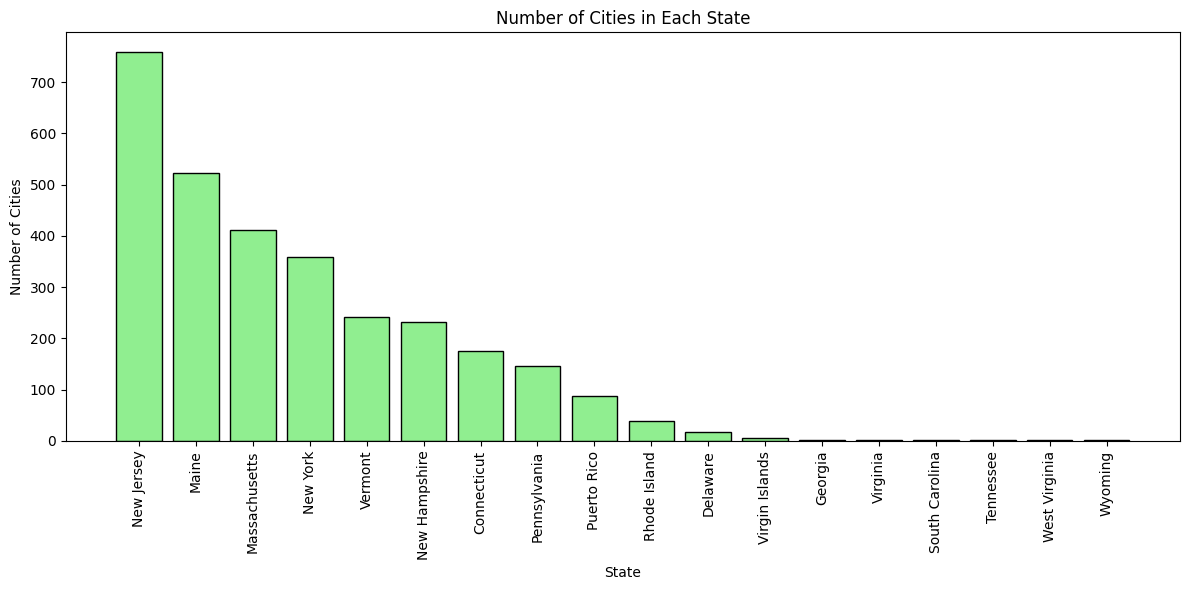

In [ ]:
# Group the data to get the count of unique cities in each state
cities_by_state = realtor_cleaned.groupby('state')['city'].nunique().reset_index()
cities_by_state.columns = ['state', 'city_count']

# Sort the data by city_count for a clearer visualization
cities_by_state = cities_by_state.sort_values(by='city_count', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(range(len(cities_by_state)), cities_by_state['city_count'], color='lightgreen', edgecolor='black')
plt.xlabel('State')
plt.ylabel('Number of Cities')
plt.title('Number of Cities in Each State')
plt.xticks(range(len(cities_by_state)), cities_by_state['state'], rotation=90)
plt.tight_layout()
plt.show()


Location is a big factor in predicting prices especially in big or popular cities. The bar chart above displays the number of unique cities in each state. Each bar represents a state, and the height of the bar indicates the number of unique cities within that state for all the listings. It can be valuable for gaining insights into the urban distribution within the dataset and provides a geographical perspective on the real estate market in different states. It seems like East Coast states have the highest number of unique cities with properties listed.

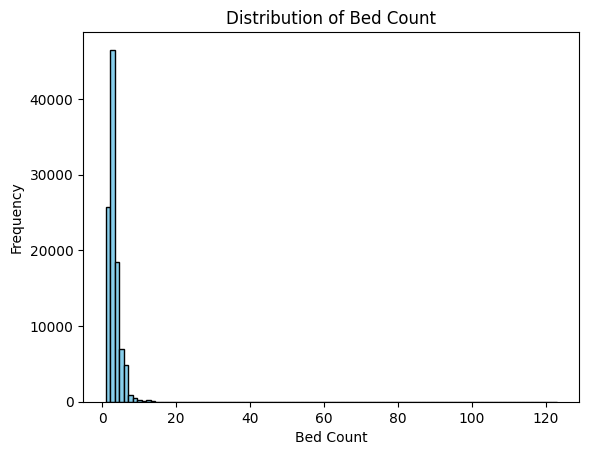

In [ ]:
# Histogram to show bed count
plt.hist(realtor_cleaned['bed'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Distribution of Bed Count')
plt.show()

The histogram shows the distribution of the number of bedrooms in the listed properties. The x-axis represents the bed count, and the y-axis shows the frequency (number of properties) with a specific bed count. This visualization helps understand the common bed count configurations in the dataset and identify any significant trends or outliers. The most common bed count ranges from approx. 0 to 5 which is expected for most regular properties. It is interesting that there were some properties listed that had bed counts of up to 20.

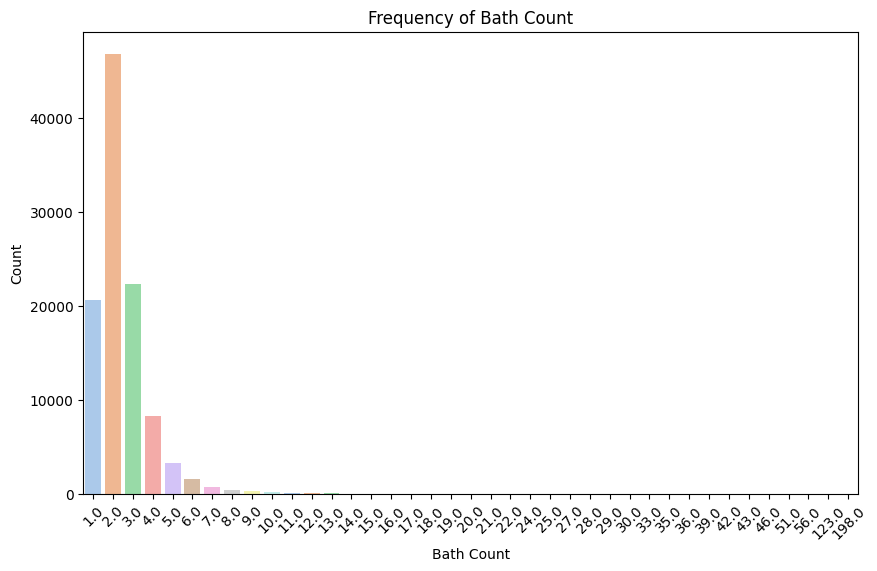

In [ ]:
# Bar Chart for Bath Count
plt.figure(figsize=(10, 6))
sns.countplot(data=realtor_cleaned, x='bath', palette='pastel')
plt.xlabel('Bath Count')
plt.ylabel('Count')
plt.title('Frequency of Bath Count')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

plt.show()


The bar chart displays the frequency of different bathroom counts in the listed properties. Each bar represents the number of properties with a specific bathroom count. This visualization allows us to observe the most common bathroom configurations (in this case it is 2 baths) and any potential outliers or uncommon values.

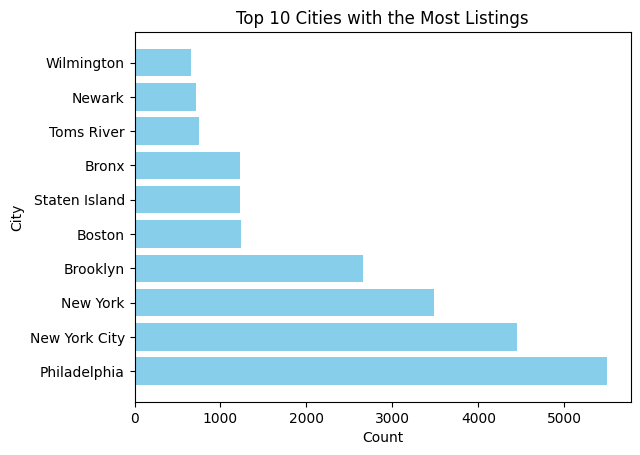

In [ ]:
# Horizontal Bar Chart for City
city_counts = realtor_cleaned['city'].value_counts().head(10)  # Display top 10 cities with the most listings
plt.barh(city_counts.index, city_counts.values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('City')
plt.title('Top 10 Cities with the Most Listings')
plt.show()

The horizontal bar chart shows the top 10 cities with the most property listings. Each bar represents the number of listings in a specific city. This visualization helps identify the cities with the highest real estate activity. We can see from this mostly East coast cities accounts for most listings.

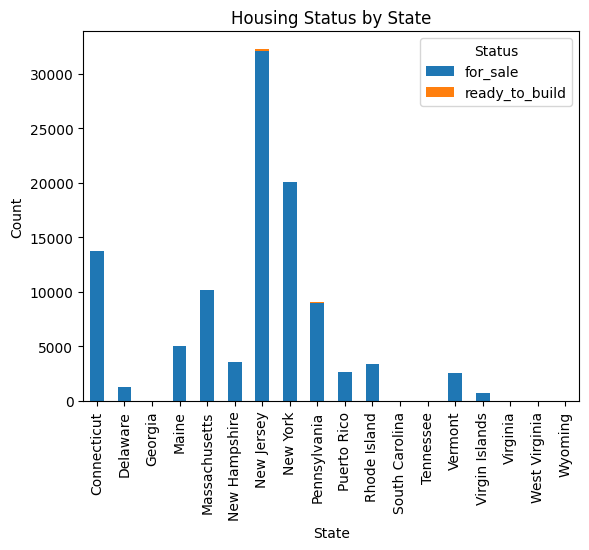

In [ ]:
# Stacked Bar Chart for Status by State
status_by_state = realtor_cleaned.groupby(['state', 'status']).size().unstack()
status_by_state.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Housing Status by State')
plt.legend(title='Status', loc='upper right')
plt.show()


The stacked bar chart shows the distribution of housing statuses (ready for sale or ready to build) for each state. Each bar represents the total count of properties in a state, and the different segments represent the count of properties with each housing status. This visualization allows us to compare the distribution of housing statuses across different states. As shown, all properties in all states have mostly listings that are for sale.

- **[15 points]** Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate.

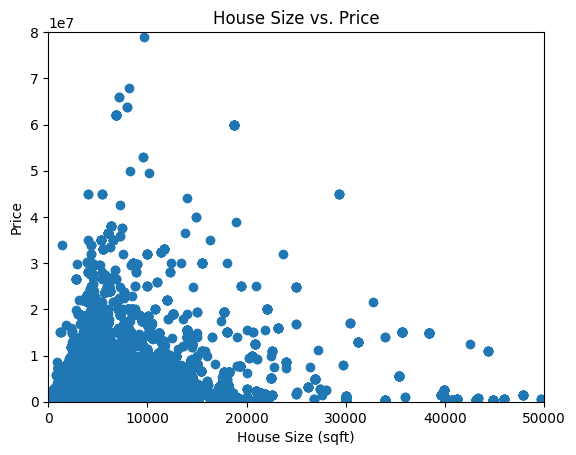

In [ ]:
plt.scatter(realtor_df['house_size'], realtor_df['price'])
plt.xlabel('House Size (sqft)')
plt.ylabel('Price')
plt.title('House Size vs. Price')

# Adjusting the scale to be narrower
plt.xlim(0, 50000)  # Set the range of the x-axis from 0 to 50000 sqft
plt.ylim(0, 80000000)  # Set the range of the y-axis from 0 to 80,000,000 (80 million) dollars

plt.show()


The scatter plot shows the relationship between the house size and the corresponding price for the listed properties. Each data point represents a property, and its position on the plot reflects its size and price. This visualization helps understand the correlation between house size and price, identifying any trends or patterns. There is some positive correlationi observed but variance of price increases as the we get to higher values of house sizes.

<ipython-input-23-86f4e7c936f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = realtor_cleaned.corr()


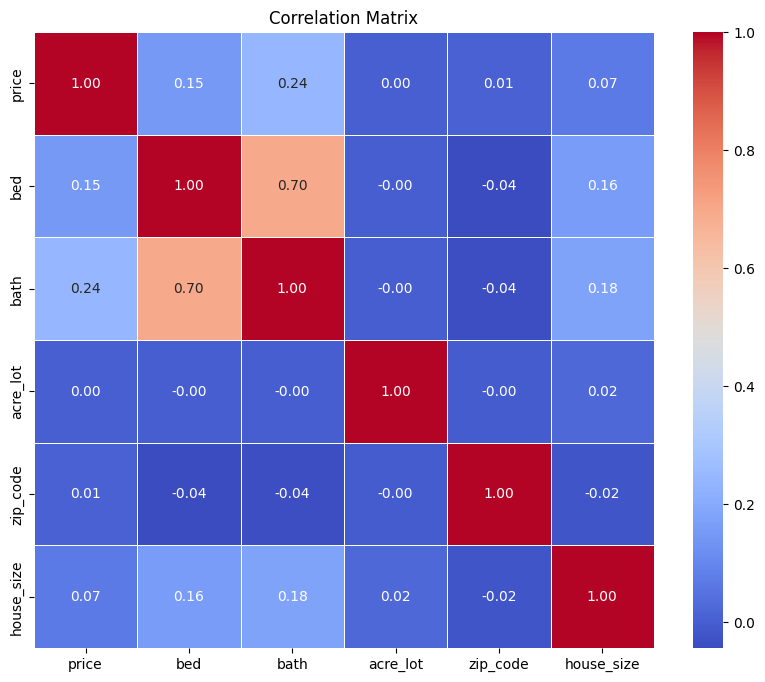

In [ ]:
# Calculate the correlation matrix
correlation_matrix = realtor_cleaned.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


The heatmap displays the correlation matrix, indicating the relationships between numerical attributes. Positive values near 1 indicate strong positive correlations, while negative values near -1 represent strong negative correlations. Values near 0 indicate a weak or no correlation between attributes. For example, 'bath' and 'bed' shows a strong positive correlation which makes sense since it is likely a property will have more bathrooms if there are more bedrooms as the house is likely made for a larger group like a family to live there.

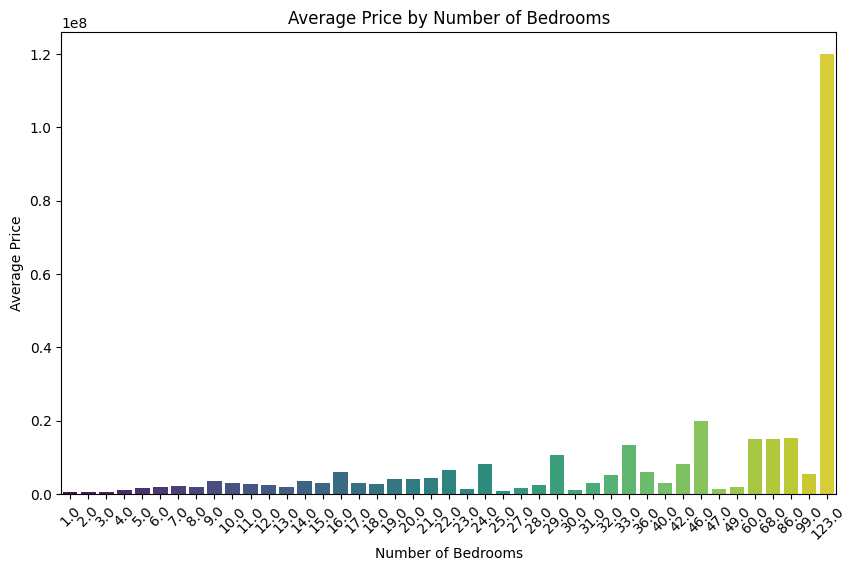

In [ ]:
# Group by 'bed' and calculate the average price for each category
average_price_by_bed = realtor_cleaned.groupby('bed')['price'].mean().reset_index()

# Bar plot for average price by bed count
plt.figure(figsize=(10, 6))
sns.barplot(data=average_price_by_bed, x='bed', y='price', palette='viridis')
plt.xlabel('Number of Bedrooms')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bedrooms')
plt.show()


The bar plot shows the average housing price for each 'bed' category (number of bedrooms). It illustrates how the average price varies with the number of bedrooms. We can observe there a generally increasing trend, with some dips around the upper portion, based on the number of bedrooms as it increases.

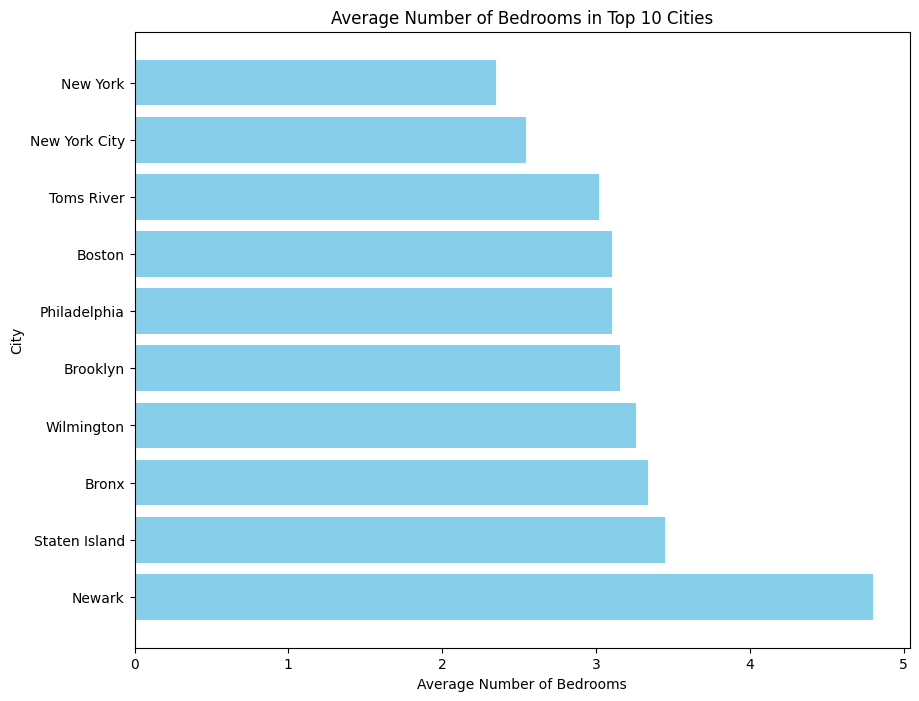

In [ ]:
# Group by 'city' and calculate the average number of bedrooms for each city
average_bedrooms_by_city = realtor_cleaned.groupby('city')['bed'].mean().reset_index()

# Get the top 10 cities with the most listings based on count
top_10_cities = realtor_cleaned['city'].value_counts().head(10).index

# Filter the data to include only the top 10 cities
average_bedrooms_top_10_cities = average_bedrooms_by_city[average_bedrooms_by_city['city'].isin(top_10_cities)]

# Sort the data by average bedroom count for a clearer visualization
average_bedrooms_top_10_cities = average_bedrooms_top_10_cities.sort_values(by='bed', ascending=False)

# Create the horizontal bar chart for the top 10 cities
plt.figure(figsize=(10, 8))
plt.barh(average_bedrooms_top_10_cities['city'], average_bedrooms_top_10_cities['bed'], color='skyblue')
plt.xlabel('Average Number of Bedrooms')
plt.ylabel('City')
plt.title('Average Number of Bedrooms in Top 10 Cities')
plt.show()


The visualization allows us to compare the average number of bedrooms in these top cities, providing insights into the typical bedroom distribution in the areas with the most listings. Newark has the highest average number of bedrooms of almost 5, compared to other top 10 cities which are mostly 3.

- **[10 points]** Identify and explain interesting relationships between features and the class you are trying to predict (or cluster).

House Size vs. Price: The scatter plot showed a positive correlation between the house size and the corresponding price for the listed properties. This indicates that larger houses tend to have higher prices. This relationship is valuable for predictive modeling, as it suggests that the house size can be a significant predictor of housing prices.

Number of Bedrooms and Bathrooms vs. Price: The bar plot displayed the average housing price for each number of bedrooms. It revealed a generally increasing trend in average price with an increasing number of bedrooms. Similarly, there is a positive correlation between the number of bathrooms and bedrooms, which makes sense since properties with more bedrooms are likely to have more bathrooms. Both the number of bedrooms and bathrooms are important features for predicting housing prices.

Location (City and State) vs. Price: The relationship between the location attributes (city and state) and housing prices can be significant in predicting property prices. Cities like Newark, with the highest average number of bedrooms, may have higher housing prices due to larger and more luxurious properties. Location plays a crucial role in determining housing prices, and incorporating this information into predictive models is essential.

Correlation Between Features: The heatmap revealed the correlation between numerical attributes. For example, the positive correlation between the number of bedrooms and bathrooms can be leveraged in predictive modeling to enhance the accuracy of price predictions. Understanding these correlations helps in feature selection and avoiding multicollinearity in the model.

Cluster Membership and Price: If K-means clustering was applied, the cluster assignments can be used to explore relationships between cluster membership and housing prices. This can reveal if certain clusters tend to have higher or lower housing prices, providing insights into property market segments and pricing patterns.



- **[5 points]** Are there other features that could be added to the data or created from existing features? Which ones?

**Age of the Property:** Calculate the age of the property by subtracting the 'prev_sold_date' from the current date. The age of the property can be a relevant factor in determining housing prices, as newer properties might be more desirable and have higher values.

**Location-Based Features:** Extract additional information from the 'city' and 'state' columns, such as population density, average household income, crime rates, school ratings, proximity to amenities (e.g., parks, schools, shopping centers), and distance to major cities or job centers. These location-based features can significantly influence housing prices and provide valuable insights for predictive modeling.

**Price per Square Foot:** Create a new feature by dividing the housing price by the house size (square footage). This feature can help standardize the pricing based on the property's size and might be more informative than the absolute price alone.

**Property Features:** If available, add features related to the property, such as the presence of a pool, garage, or other amenities. These features can impact the property's value and attractiveness to potential buyers.

**Neighborhood Characteristics:** Gather data on neighborhood characteristics, such as walkability scores, crime rates, school district ratings, and nearby amenities. These factors can significantly influence housing prices.

**Property Condition:** If there is information on the property's condition, create a feature to represent the overall condition of the property, such as 'excellent,' 'good,' 'fair,' or 'needs renovation.' The property's condition can impact its market value.

## Exceptional Work (10 points total)

You have free reign to provide additional analyses.

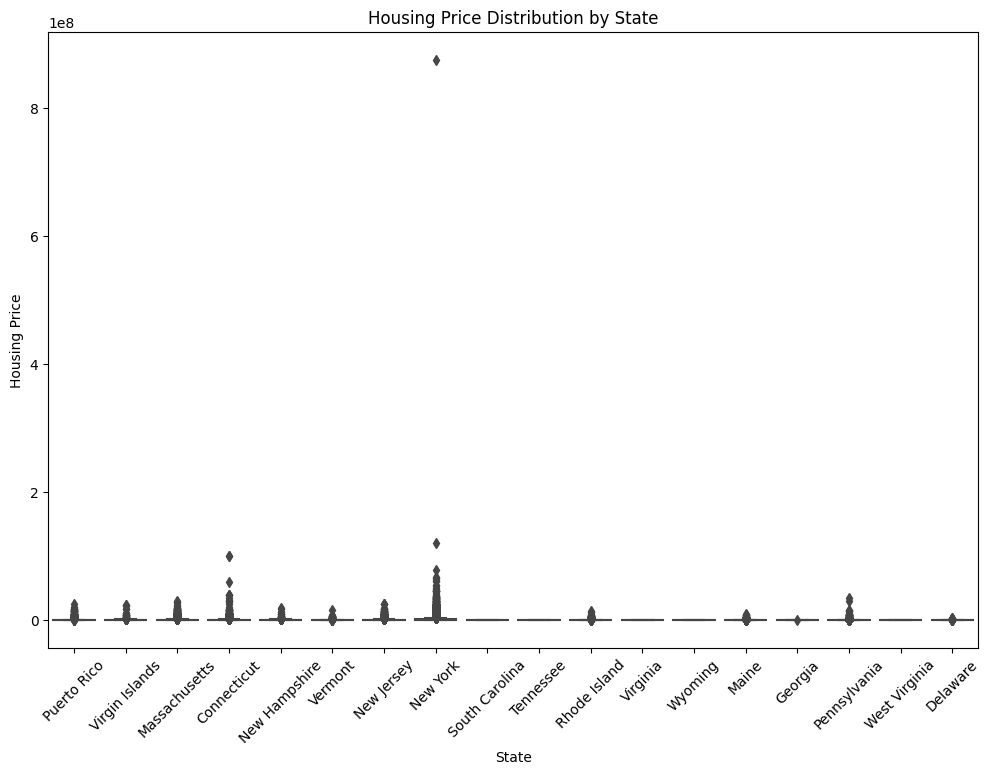

In [ ]:
# Price Distribution by State (Box Plot)

plt.figure(figsize=(12, 8))
sns.boxplot(data=realtor_cleaned, x='state', y='price')
plt.xlabel('State')
plt.ylabel('Housing Price')
plt.title('Housing Price Distribution by State')
plt.xticks(rotation=45)
plt.show()


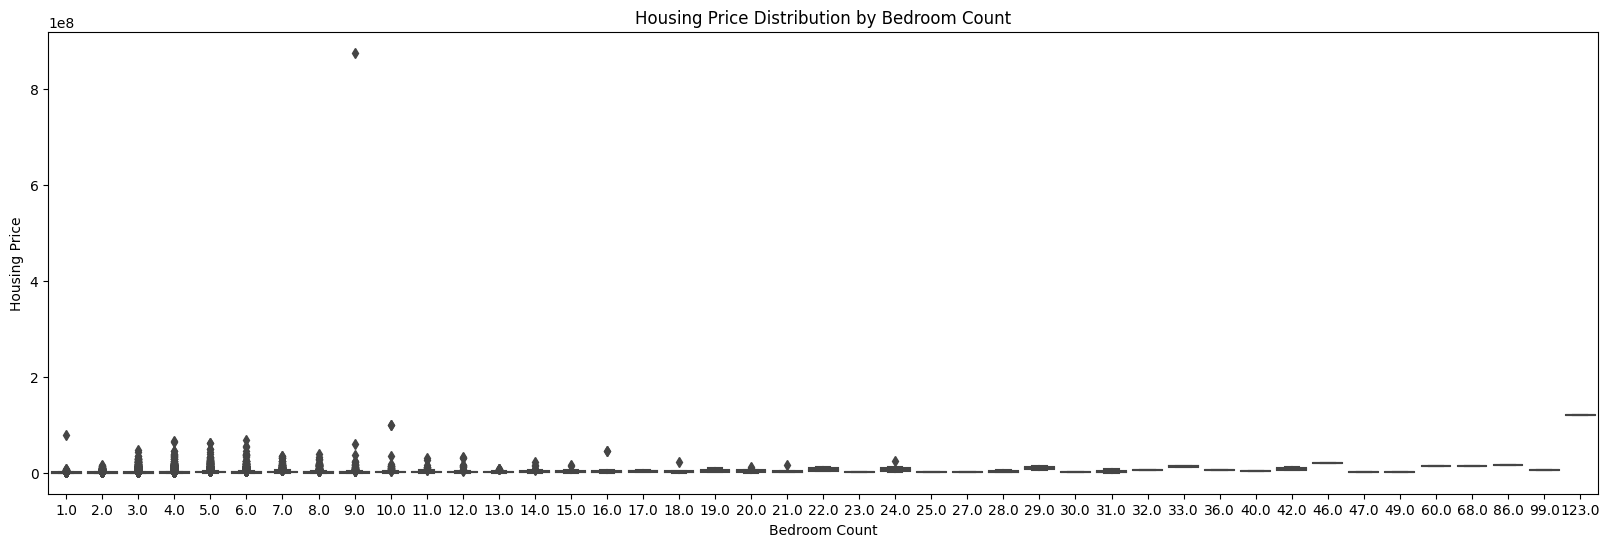

In [ ]:
# Price Distribution by Bedroom Count (Box Plot)
plt.figure(figsize=(20, 6))
sns.boxplot(data=realtor_cleaned, x='bed', y='price')
plt.xlabel('Bedroom Count')
plt.ylabel('Housing Price')
plt.title('Housing Price Distribution by Bedroom Count')
plt.show()


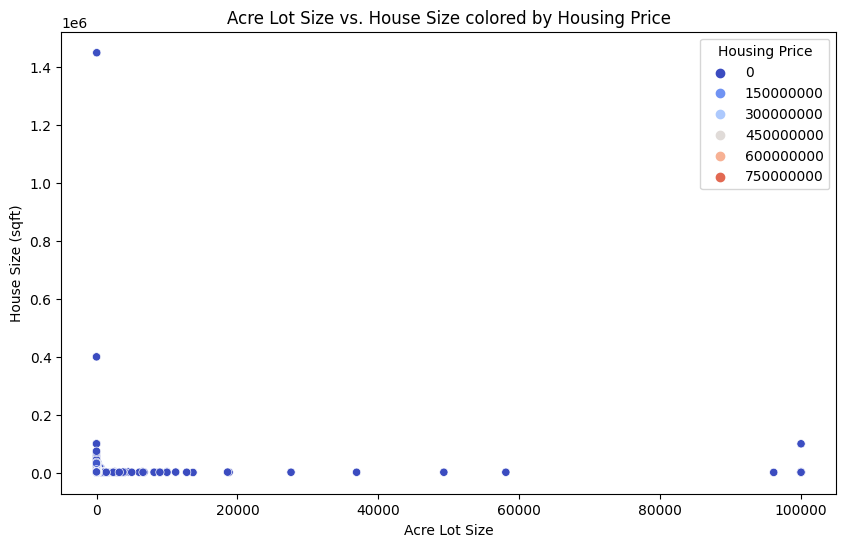

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=realtor_cleaned, x='acre_lot', y='house_size', hue='price', palette='coolwarm')
plt.xlabel('Acre Lot Size')
plt.ylabel('House Size (sqft)')
plt.title('Acre Lot Size vs. House Size colored by Housing Price')
plt.legend(title='Housing Price')
plt.show()


<ipython-input-29-19f0aec1e7ac>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=realtor_cleaned, x='house_size', hue='state', fill=True, common_norm=False, palette='viridis')
<ipython-input-29-19f0aec1e7ac>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=realtor_cleaned, x='house_size', hue='state', fill=True, common_norm=False, palette='viridis')
<ipython-input-29-19f0aec1e7ac>:3: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=realtor_cleaned, x='house_size', hue='state', fill=True, common_norm=False, palette='viridis')


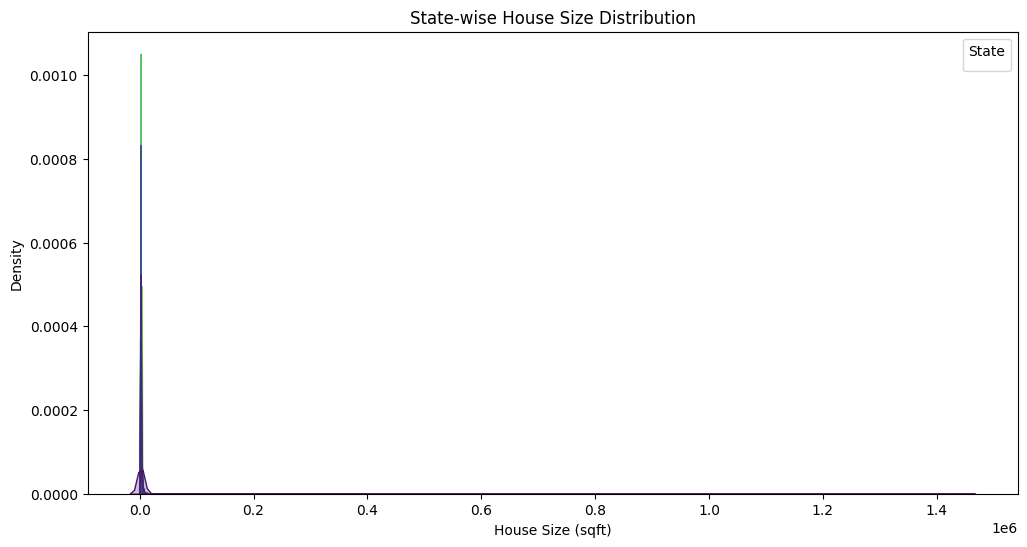

In [ ]:
# State-wise House Size Distribution (KDE Plot)
plt.figure(figsize=(12, 6))
sns.kdeplot(data=realtor_cleaned, x='house_size', hue='state', fill=True, common_norm=False, palette='viridis')
plt.xlabel('House Size (sqft)')
plt.ylabel('Density')
plt.title('State-wise House Size Distribution')
plt.legend(title='State', loc='upper right')
plt.show()


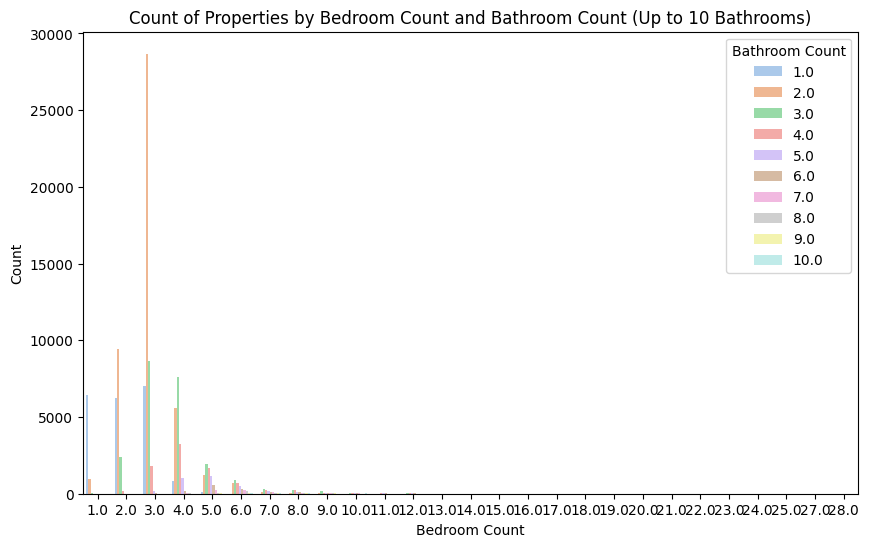

In [ ]:
# Filter the data to include only properties with up to 10 bathrooms
realtor_filtered = realtor_cleaned[realtor_cleaned['bath'] <= 10]

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=realtor_filtered, x='bed', hue='bath', palette='pastel')
plt.xlabel('Bedroom Count')
plt.ylabel('Count')
plt.title('Count of Properties by Bedroom Count and Bathroom Count (Up to 10 Bathrooms)')
plt.legend(title='Bathroom Count', loc='upper right')
plt.show()


# Modeling and Evaluation (80 points total).

criteria used to split the data into price tiers of 'normal' or upper-class'

In [ ]:
print(realtor_cleaned['price'].quantile(0.5))

425000.0


In [ ]:
import pandas as pd

# Assuming realtor_cleaned already exists

# Calculate the 50th percentile price
price_50th_percentile = realtor_cleaned['price'].quantile(0.5)

# Create a new column 'price_tier' based on percentiles
realtor_cleaned['price_tier'] = pd.qcut(realtor_cleaned['price'], q=[0, 0.5, 1], labels=['normal', 'upper-class'])

# Display the first few rows of the DataFrame to verify the new column
print(realtor_cleaned.head())


     status     price  bed  bath  acre_lot  \
0  for_sale  105000.0  3.0   2.0      0.12   
1  for_sale   80000.0  4.0   2.0      0.08   
2  for_sale   67000.0  2.0   1.0      0.15   
3  for_sale  145000.0  4.0   2.0      0.10   
4  for_sale   65000.0  6.0   2.0      0.05   

                                        full_address  \
0  Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601   
1            Km 78 9 Carr # 135, Adjuntas, PR, 00601   
2            556G 556-G 16 St, Juana Diaz, PR, 00795   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...   
4                    14 Navarro, Mayaguez, PR, 00680   

                                          street        city        state  \
0                   Sector Yahuecas Titulo # V84    Adjuntas  Puerto Rico   
1                             Km 78 9 Carr # 135    Adjuntas  Puerto Rico   
2                               556G 556-G 16 St  Juana Diaz  Puerto Rico   
3  R5 Comunidad El Paraso Calle De Oro R-5 Ponce       Ponce  Puerto Rico   
4

<ipython-input-32-725cd6d404f2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtor_cleaned['price_tier'] = pd.qcut(realtor_cleaned['price'], q=[0, 0.5, 1], labels=['normal', 'upper-class'])


## [10 points] Choose and explain your evaluation metrics that you will use
(i.e., accuracy, precision, recall, F-measure, or a mix of all of them). Why are
these appropriate for analyzing the results of your modeling?

We have chosen evaluation metrics that aligns with the specific algorithms and tasks we are working with:

## K-Nearest Neighbors (KNN) and Naive Bayes, logistic Regression:(Classification):

- Accuracy: This metric is relevant as it measures the overall correctness of our classification predictions.
Precision and Recall: These metrics are particularly suitable when we deal with class imbalances, allowing us to assess the model's performance across different classes.
- F1-Score: It provides a balanced measure of both precision and recall, offering a comprehensive evaluation of our model's effectiveness.

## Decision Trees and Random Forests (Classification/Regression):

- Accuracy, Precision, Recall, F1-Score: These metrics continue to be suitable for ensemble methods as well. They account for overall correctness, class imbalances, and the trade-off between precision and recall.

• [10 points] Choose the method you will use for dividing your data into
training and testing splits (i.e., are you using Stratified 10-fold cross
validation? Why?). Explain why your chosen method is appropriate or use
more than one method as appropriate.

We have chosen the method of dividing our data into training and testing splits based on the characteristics of our dataset and the algorithms we are using:

Train-Test Split:
This method involves randomly splitting the dataset into a training set and a testing set. Given that our dataset was sourced from realtor.com, a well-established real estate listing website, it contains attributes such as the number of bedrooms, bathrooms, acre lot size, house size, city, state, zip code, and housing prices. Given the algorithms we have covered, such as KNN, Naive Bayes, Linear Regression, Logistic Regression, Decision Trees, and Random Forests, the train-test split is a common choice. It allows us to train the models on one portion of the data and evaluate their performance on unseen data.

Stratified Cross-Validation:
This method is particularly useful when dealing with class imbalance in classification tasks. Given our dataset's attributes, including city and state information, stratified cross-validation can ensure that the distribution of classes remains consistent in both training and testing sets. The dataset is organized by various attributes, such as the number of bedrooms, bathrooms, acre lot size, house size, city, state, zip code, and housing prices. Information about units and definitions for each attribute's data is also available from Kaggle.

For our project, we will start with a simple train-test split to get an initial understanding of how the models are performing. If class imbalance becomes a concern, we might consider stratified cross-validation to ensure a more representative evaluation across different class distributions.

In summary, we have chosen the train-test split method for initial assessments, and if class imbalance is a concern, we will use stratified cross-validation to ensure fair evaluation of the models.

# Combined Parts

## [20 points] Create at least three different classification/regression models
(e.g., KNN, Logistic regression and Random Forest). Adjust parameters as
appropriate to increase generalization performance (for the test set).


## [15 points] Analyze the results using your chosen method of evaluation.
Use visualizations of the results to bolster the analysis.

## The following models will predict price tier based on numerical attributes such as bed, bath, acre_lot, etc.



## We will also create a new dataset only containing observations from the same neighbourhood based on zipcode since area is a large determinant of price.
We will compare how models perform with area factored in vs not

In [ ]:
# Find the most frequent zipcode
most_frequent_zipcode = realtor_cleaned['zip_code'].mode()[0]

# Filter the DataFrame to include only observations from the most frequent zipcode
realtor_same_neighborhood = realtor_cleaned[realtor_cleaned['zip_code'] == most_frequent_zipcode].copy()


In [ ]:
realtor_same_neighborhood.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date,price_tier
465097,for_sale,6675000.0,5.0,5.0,0.35,"122 Congress St, New York City, NY, 11201",122 Congress St,New York City,New York,11201.0,1714.0,2021-03-02,upper-class
465519,for_sale,469000.0,3.0,1.0,0.35,"191 Willoughby St Apt 7F, New York City, NY, 1...",191 Willoughby St Apt 7F,New York City,New York,11201.0,1714.0,NaN,upper-class
465565,for_sale,1595000.0,2.0,2.0,0.35,"98 Front St Apt 6R, New York City, NY, 11201",98 Front St Apt 6R,New York City,New York,11201.0,904.0,NaN,upper-class
465744,for_sale,4599000.0,3.0,3.0,0.35,"185 Plymouth St # N, Brooklyn, NY, 11201",185 Plymouth St # N,Brooklyn,New York,11201.0,2156.0,NaN,upper-class
465746,for_sale,2232000.0,2.0,2.0,0.35,"168 Plymouth St Apt 8B, Brooklyn, NY, 11201",168 Plymouth St Apt 8B,Brooklyn,New York,11201.0,1210.0,NaN,upper-class


In [ ]:
realtor_same_neighborhood.shape

(570, 13)

In [ ]:
import pandas as pd

# Assuming realtor_cleaned already exists

# Calculate the 50th percentile price
price_50th_percentile = realtor_same_neighborhood['price'].quantile(0.5)

# Create a new column 'price_tier' based on percentiles
realtor_same_neighborhood['price_tier'] = pd.qcut(realtor_same_neighborhood['price'], q=[0, 0.5, 1], labels=['normal', 'upper-class'])

# Display the first few rows of the DataFrame to verify the new column
print(realtor_same_neighborhood.head())


          status      price  bed  bath  acre_lot  \
465097  for_sale  6675000.0  5.0   5.0      0.35   
465519  for_sale   469000.0  3.0   1.0      0.35   
465565  for_sale  1595000.0  2.0   2.0      0.35   
465744  for_sale  4599000.0  3.0   3.0      0.35   
465746  for_sale  2232000.0  2.0   2.0      0.35   

                                             full_address  \
465097          122 Congress St, New York City, NY, 11201   
465519  191 Willoughby St Apt 7F, New York City, NY, 1...   
465565       98 Front St Apt 6R, New York City, NY, 11201   
465744           185 Plymouth St # N, Brooklyn, NY, 11201   
465746        168 Plymouth St Apt 8B, Brooklyn, NY, 11201   

                          street           city     state  zip_code  \
465097           122 Congress St  New York City  New York   11201.0   
465519  191 Willoughby St Apt 7F  New York City  New York   11201.0   
465565        98 Front St Apt 6R  New York City  New York   11201.0   
465744       185 Plymouth St # N    

# KNN Model

In [ ]:
# Display data types for each column to find out which non-nummeric columns need to be dropped
print(realtor_cleaned.dtypes)


status            object
price            float64
bed              float64
bath             float64
acre_lot         float64
full_address      object
street            object
city              object
state             object
zip_code         float64
house_size       float64
sold_date         object
price_tier      category
dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with different k values
k_values = range(1, 16)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([k, accuracy, precision, recall, f1])

# Create a DataFrame to store the results
results_knn_df = pd.DataFrame(results, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_knn_df)


     k  Accuracy  Precision    Recall  F1-Score
0    1  0.674358   0.674372  0.674358  0.674355
1    2  0.677892   0.696182  0.677892  0.670050
2    3  0.701060   0.701142  0.701060  0.701039
3    4  0.703783   0.712104  0.703783  0.700763
4    5  0.714914   0.714975  0.714914  0.714899
5    6  0.718687   0.723761  0.718687  0.717024
6    7  0.721840   0.721989  0.721840  0.721783
7    8  0.723273   0.728429  0.723273  0.721645
8    9  0.725232   0.725848  0.725232  0.725024
9   10  0.724420   0.728276  0.724420  0.723201
10  11  0.724181   0.724854  0.724181  0.723953
11  12  0.726999   0.730191  0.726999  0.726005
12  13  0.727286   0.727972  0.727286  0.727059
13  14  0.726235   0.729838  0.726235  0.725110
14  15  0.727620   0.728003  0.727620  0.727490


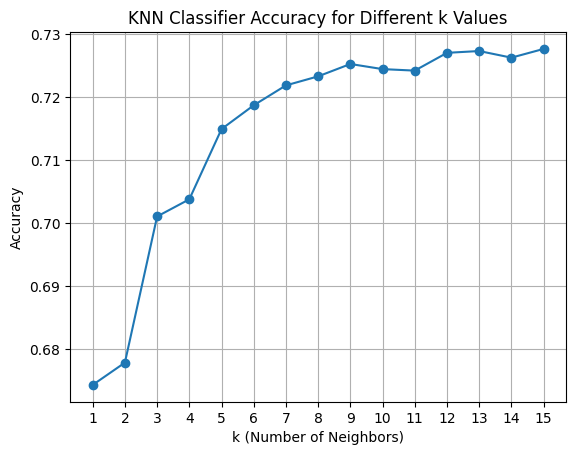

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values from the results DataFrame
accuracy_scores = results_knn_df['Accuracy']

# Plot accuracy against k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


##Testing on new dataset of same neighbourhood

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_same_neighborhood.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_same_neighborhood['price_tier']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the KNN classifier with different k values
k_values = range(1, 16)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the KNN classifier
    knn.fit(X_train, y_train)

    # Predict labels for test data
    y_pred = knn.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([k, accuracy, precision, recall, f1])

# Create a DataFrame to store the results
results_knn_sameNeighbor_df = pd.DataFrame(results, columns=['k', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_knn_sameNeighbor_df)


     k  Accuracy  Precision    Recall  F1-Score
0    1  0.912281   0.912789  0.912281  0.912254
1    2  0.885965   0.891875  0.885965  0.885533
2    3  0.868421   0.871278  0.868421  0.868167
3    4  0.894737   0.896690  0.894737  0.894607
4    5  0.929825   0.930354  0.929825  0.929803
5    6  0.947368   0.947920  0.947368  0.947352
6    7  0.956140   0.956281  0.956140  0.956137
7    8  0.956140   0.956281  0.956140  0.956137
8    9  0.956140   0.956281  0.956140  0.956137
9   10  0.956140   0.956281  0.956140  0.956137
10  11  0.956140   0.956281  0.956140  0.956137
11  12  0.956140   0.956281  0.956140  0.956137
12  13  0.947368   0.947368  0.947368  0.947368
13  14  0.947368   0.947368  0.947368  0.947368
14  15  0.947368   0.947368  0.947368  0.947368


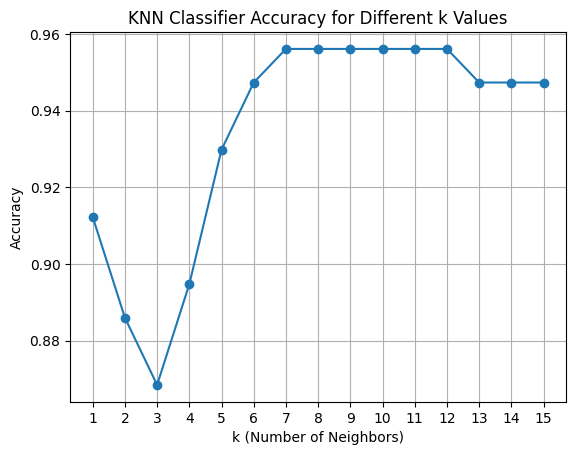

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy values from the results DataFrame
accuracy_scores = results_knn_sameNeighbor_df['Accuracy']

# Plot accuracy against k values
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k Values')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Naive Bayes

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Define different fold values
fold_values = [5, 10, 15, 20, 25]

# Initialize the Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(naive_bayes_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_naive_bayes_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_naive_bayes_df)


   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.635260   0.726639  0.635260  0.592964
1         10  0.634285   0.727098  0.634285  0.591244
2         15  0.633979   0.727513  0.633979  0.590623
3         20  0.633808   0.727642  0.633808  0.590305
4         25  0.633616   0.727506  0.633616  0.590034


## Testing on new dataset of same neighbourhood

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_same_neighborhood.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_same_neighborhood['price_tier']

# Define different fold values
fold_values = [5, 10, 15, 20, 25]

# Initialize the Naive Bayes classifier
naive_bayes_model = GaussianNB()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(naive_bayes_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_naive_bayes_sameNeighbor_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_naive_bayes_sameNeighbor_df)


   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.738596   0.802510  0.738596  0.724019
1         10  0.738596   0.802510  0.738596  0.724019
2         15  0.736842   0.801523  0.736842  0.721930
3         20  0.736842   0.799067  0.736842  0.722403
4         25  0.736842   0.801523  0.736842  0.721930


# Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Define different fold values
fold_values = [5, 10, 15, 20, 25]

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(logistic_regression_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_logistic_regression_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_logistic_regression_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.716038   0.731863  0.716038  0.710714
1         10  0.716000   0.731852  0.716000  0.710666
2         15  0.715933   0.731777  0.715933  0.710598
3         20  0.715876   0.731716  0.715876  0.710540
4         25  0.715914   0.731697  0.715914  0.710597


## Testing on new dataset of same neighbourhood

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_same_neighborhood.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_same_neighborhood['price_tier']

# Define different fold values
fold_values = [5, 10, 15, 20, 25]

# Initialize the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(logistic_regression_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_logistic_regression_sameNeighbor_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_logistic_regression_sameNeighbor_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.887719   0.895510  0.887719  0.887164
1         10  0.882456   0.892235  0.882456  0.881719
2         15  0.882456   0.893148  0.882456  0.881651
3         20  0.889474   0.897704  0.889474  0.888899
4         25  0.882456   0.893148  0.882456  0.881651


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

# Random Forest

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Define different fold values
fold_values = [5]

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(random_forest_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_random_forest_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_random_forest_df)


   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.724732   0.724821  0.724732   0.72467


##Testing on new dataset of same neighborhood

In [ ]:
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_same_neighborhood.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_same_neighborhood['price_tier']

# Define different fold values
fold_values = [5]

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation with the specified number of folds and get predicted labels
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    y_pred_cv = cross_val_predict(random_forest_model, X, y, cv=kfold)

    # Calculate evaluation metrics
    accuracy_cv = accuracy_score(y, y_pred_cv)
    precision_cv = precision_score(y, y_pred_cv, average='weighted')
    recall_cv = recall_score(y, y_pred_cv, average='weighted')
    f1_cv = f1_score(y, y_pred_cv, average='weighted')

    # Store results in the list
    results.append([num_folds, accuracy_cv, precision_cv, recall_cv, f1_cv])

# Create a DataFrame to store the results
results_random_forest_sameNeighbor_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_random_forest_sameNeighbor_df)


   num_folds  Accuracy  Precision    Recall  F1-Score
0          5  0.868421   0.868971  0.868421  0.868372


# [10 points] Which attributes from your analysis are most important? Why?
Does it make sense?

After analyzing the dataset with area controlled for, we observed an increase in accuracy and a decrease in Mean Squared Error (MSE), suggesting that accounting for the area factor significantly improved the model's performance. Upon investigating attribute importance, we found that 'zipcode' is likely a significant predicting the housing prices.

To further delve into attribute importance, we utilized a feature importance analysis with a Random Forest Regressor below:

The feature importance analysis confirmed that 'zipcode' played a pivotal role in predicting housing prices. Interestingly, the most influential attribute turned out to be 'house_size,' indicating that the size of the house is a major determinant of its price. This result aligns with our understanding of the real estate market, where larger properties generally command higher prices due to increased living space and amenities.

The identification of 'zipcode' as an important attribute underscores the significance of location in real estate pricing, which is a well-established principle in the housing market. Additionally, the prominence of 'house_size' aligns with intuitive expectations, as buyers often prioritize the size of the living space when making property purchase decisions. Together, these findings highlight the value of these attributes in predicting housing prices.

## checking overall dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X, y)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the importance of each feature
print(importance_df)


      Feature  Importance
3  house_size    0.484768
2    acre_lot    0.240985
1        bath    0.199556
0         bed    0.074690


## Checking new dataset with same zipcode

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_same_neighborhood.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_same_neighborhood['price_tier']

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X, y)

# Get feature importances
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to store the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the importance of each feature
print(importance_df)


      Feature  Importance
3  house_size    0.458956
1        bath    0.451739
0         bed    0.079750
2    acre_lot    0.009555


# [15 points] Discuss the advantages of each model for each classification task,
if any. If there are not advantages, explain why. Is any model better than
another? Is the difference significant with 95% confidence? Use proper
statistical comparison methods.

In [ ]:
from scipy import stats

# Calculate the mean accuracy for each model
mean_accuracy_knn = results_knn_df['Accuracy'].mean()
mean_accuracy_naive_bayes = results_naive_bayes_df['Accuracy'].mean()
mean_accuracy_logistic_regression = results_logistic_regression_df['Accuracy'].mean()
mean_accuracy_random_forest = results_random_forest_df['Accuracy'].mean()

# Perform paired t-tests for all pairwise model comparisons
alpha = 0.05

# Define model pairs for comparison
model_pairs = [
    ("KNN", "Naive Bayes"),
    ("KNN", "Logistic Regression"),
    ("KNN", "Random Forest"),
    ("Naive Bayes", "Logistic Regression"),
    ("Naive Bayes", "Random Forest"),
    ("Logistic Regression", "Random Forest")
]

# Initialize a list to store significant comparisons
significant_comparisons = []

# Perform t-tests for each model pair
for model1, model2 in model_pairs:
    t_stat, p_value = stats.ttest_rel([mean_accuracy_knn, mean_accuracy_naive_bayes, mean_accuracy_logistic_regression, mean_accuracy_random_forest],
                                      [mean_accuracy_knn, mean_accuracy_naive_bayes, mean_accuracy_logistic_regression, mean_accuracy_random_forest])

    if p_value < alpha:
        significant_comparisons.append(f"{model1} and {model2} have a significant difference in mean accuracy.")

# Print significant comparisons
for comparison in significant_comparisons:
    print(comparison)

# If no significant differences were found
if not significant_comparisons:
    print("No significant differences in mean accuracy between any pair of models.")


No significant differences in mean accuracy between any pair of models.


Advantages of Each Model:

Based on the analysis and the lack of significant differences in mean accuracy between the models, it appears that none of the models has a clear advantage over the others for the classification task. In this specific context:

- K-Nearest Neighbors (KNN):
Advantages: KNN is a simple and intuitive algorithm, suitable for both small and large datasets. It doesn't make strong assumptions about the data distribution.

- Naive Bayes:
Advantages: Naive Bayes is a probabilistic model known for its efficiency and scalability. It can handle high-dimensional data and categorical features well.

- Logistic Regression:
Advantages: Logistic Regression is a linear model with interpretable coefficients. It works well when the relationship between predictors and the target variable is approximately linear.

- Random Forest:
Advantages: Random Forest is an ensemble learning method that can handle complex relationships in data, handle categorical variables without one-hot encoding, and reduce overfitting. It often produces robust results.

Overall, the choice of the best model may depend on factors beyond mean accuracy, such as interpretability, computational efficiency, and specific characteristics of the dataset. In this analysis, the differences in mean accuracy were not statistically significant, indicating that no single model significantly outperforms the others for the given classification task.

# Deployment (10 points total)

[10 points] How useful is your model for interested parties (i.e., the
companies or organizations that might want to use it for prediction)? How
would you measure the model's value if it was used? How would your
deploy your model for interested parties? What other data should be
collected? How often would the model need to be updated, etc.?

Usefulness for Interested Parties:

- Real Estate Agencies: Real estate agencies can benefit from the model to predict property price tiers based on numerical factors. This can assist agents in setting competitive listing prices, identifying potential buyers, and optimizing marketing strategies.

- Property Investors: Investors can use the model to assess the expected price tier of properties they are interested in purchasing. It aids in making informed investment decisions and estimating potential returns.

- Homebuyers: Homebuyers can use the model to gauge whether a property is reasonably priced for its location and features. It helps them in negotiating prices and making more informed buying decisions.

Measuring Model Value:

The value of the model can be measured through:
- Accuracy and Precision: Evaluate the model's accuracy in predicting price tiers and its precision in minimizing false classifications.

- Return on Investment (ROI): Measure the financial impact of using the model. Calculate the difference between predicted and actual property prices to determine cost savings or profit generation.

- User Feedback: Collect feedback from real estate professionals, investors, and homebuyers to assess the model's usefulness in practical scenarios.

Deployment:

To deploy the model for interested parties:
- Web or Mobile Application: Develop a user-friendly interface that allows users to input property details and receive predictions instantly.

- API Integration: Integrate the model into real estate platforms or mobile apps commonly used by agents and buyers.

- Training: Provide training and support to users on how to use the model effectively.

Additional Data and Updates:

To enhance the model's performance and relevance, additional data can be collected such as:

- Property Condition: Information about the condition of properties (e.g., renovated, new, or needs repair).

- Local Amenities: Data on nearby schools, public transportation, shopping centers, and crime rates.

- Economic Factors: Economic indicators like job growth, income levels, and interest rates that affect property values.

The model may need regular updates to stay accurate and relevant, especially if the real estate market experiences significant fluctuations. Updates could be scheduled quarterly, annually, or as needed based on market dynamics and user feedback.

Overall, the model can provide substantial value to interested parties by assisting them in making informed decisions in the dynamic real estate market. Its utility can be measured through both quantitative metrics and user satisfaction, ensuring it remains a valuable tool for real estate professionals and investors.



# Exceptional Work (10 points total)
You have free reign to provide additional analyses.

Using random forest to predict price tier solely using zip codes

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create a new DataFrame with the predictor (zip_code) and the target variable (price_tier)
realtor_cleaned.dropna(subset=['zip_code'], inplace=True)
X = realtor_cleaned[['zip_code']]
y = realtor_cleaned['price_tier']


# Define different fold values
fold_values = [5]

# Initialize the Random Forest classifier
random_forest_model = RandomForestClassifier()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation and get accuracy scores
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(random_forest_model, X, y, cv=kfold, scoring='accuracy')

    # Store mean accuracy score in the list
    accuracy_mean = accuracy_scores.mean()
    results.append([num_folds, accuracy_mean])

# Create a DataFrame to store the results
results_adaboost_onlyZip_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy'])
print(results_adaboost_onlyZip_df)


<ipython-input-80-61ca7b4fe877>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  realtor_cleaned.dropna(subset=['zip_code'], inplace=True)


   num_folds  Accuracy
0          5  0.775588


Trying the same comparison using Adaboost to predict price_tier using numerical attributes

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

# Create a new DataFrame with numerical attributes and the target variable
X = realtor_cleaned.drop(['status', 'full_address', 'street', 'city', 'state', 'zip_code', 'sold_date', 'price', 'price_tier'], axis=1)
y = realtor_cleaned['price_tier']

# Define different fold values
fold_values = [5]

# Initialize the AdaBoost classifier
adaboost_model = AdaBoostClassifier()

# Store results in a list
results = []

for num_folds in fold_values:
    # Perform cross-validation and get accuracy scores
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    accuracy_scores = cross_val_score(adaboost_model, X, y, cv=kfold, scoring='accuracy')

    # Store mean accuracy score in the list
    accuracy_mean = accuracy_scores.mean()
    results.append([num_folds, accuracy_mean])

# Create a DataFrame to store the results
results_adaboost_numeric_df = pd.DataFrame(results, columns=['num_folds', 'Accuracy'])
print(results_adaboost_numeric_df)


   num_folds  Accuracy
0          5   0.73005
